In [1]:
 # need notebook backend for interaction
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# file-handling stuff for user, options abound! I like Tables and Pandas DataFrames
import pandas as pd
from astropy.table import Table, column
from astropy import units as u
from specutils import Spectrum1D

# import kosmos... if we do it right this should be the only other thing to import someday!
import sys  
sys.path.append('/Users/james/Dropbox/research_projects/kosmos/')

import kosmos
kosmos.__version__

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



'0.02'

In [2]:
# for all grism modes we tested (only 1 pointing needed)
# read all available lamps, identify manually all features possible
# * make reference plots, akin to what was available for DIS
# * produce a wavelength-calibrated template for future reduction

In [3]:
biasfiles = pd.read_table('biaslist.txt', names=['impath'])['impath'].values
bias = kosmos.biascombine(biasfiles) 


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
 [astropy.io.fits.verify]

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.


In [4]:
bias.shape

(4096, 2148)

In [3]:
trace = np.ones(bias.shape[0]) + 600

In [4]:
# You can check the slit settings w/ these header keywords:
# DISPERSR= 'blue    '                                                            
# SLIT    = '2.05-high'     

# Red-Center
# int_neon_bd28_4211.0001.fits

# Red-High
# int_neon_bd28_4211.0002.fits

# Red-Low
# int_neon_bd28_4211.0003.fits

# Blue-low
# int_neon_bd28_4211.0004.fits
# int_kry_bd28_4211.0001.fits
# int_neon_gd71.0001.fits
# int_kry_gd71.0001.fits
# truss_helium_gd71.0002.fits
# truss_neon_gd71.0001.fits

# Blue-Center
# truss_neon_gd71.0002.fits
# truss_helium_gd71.0003.fits
# int_kry_gd71.0002.fits
# int_neon_gd71.0002.fits

# Blue-High
# truss_helium_gd71.0004.fits
# truss_neon_gd71.0004.fits
# int_kryp_gd71.0001.fits
# int_neon_gd71.0003.fits

In [5]:
# Red-Center
# int_neon_bd28_4211.0001.fits

img_k = kosmos.proc('int_neon_bd28_4211.0001.fits', bias=bias, trim=False, Waxis=0)
ex_k, _ = kosmos.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
Fout =  ex_k.flux.value

<IPython.core.display.Javascript object>


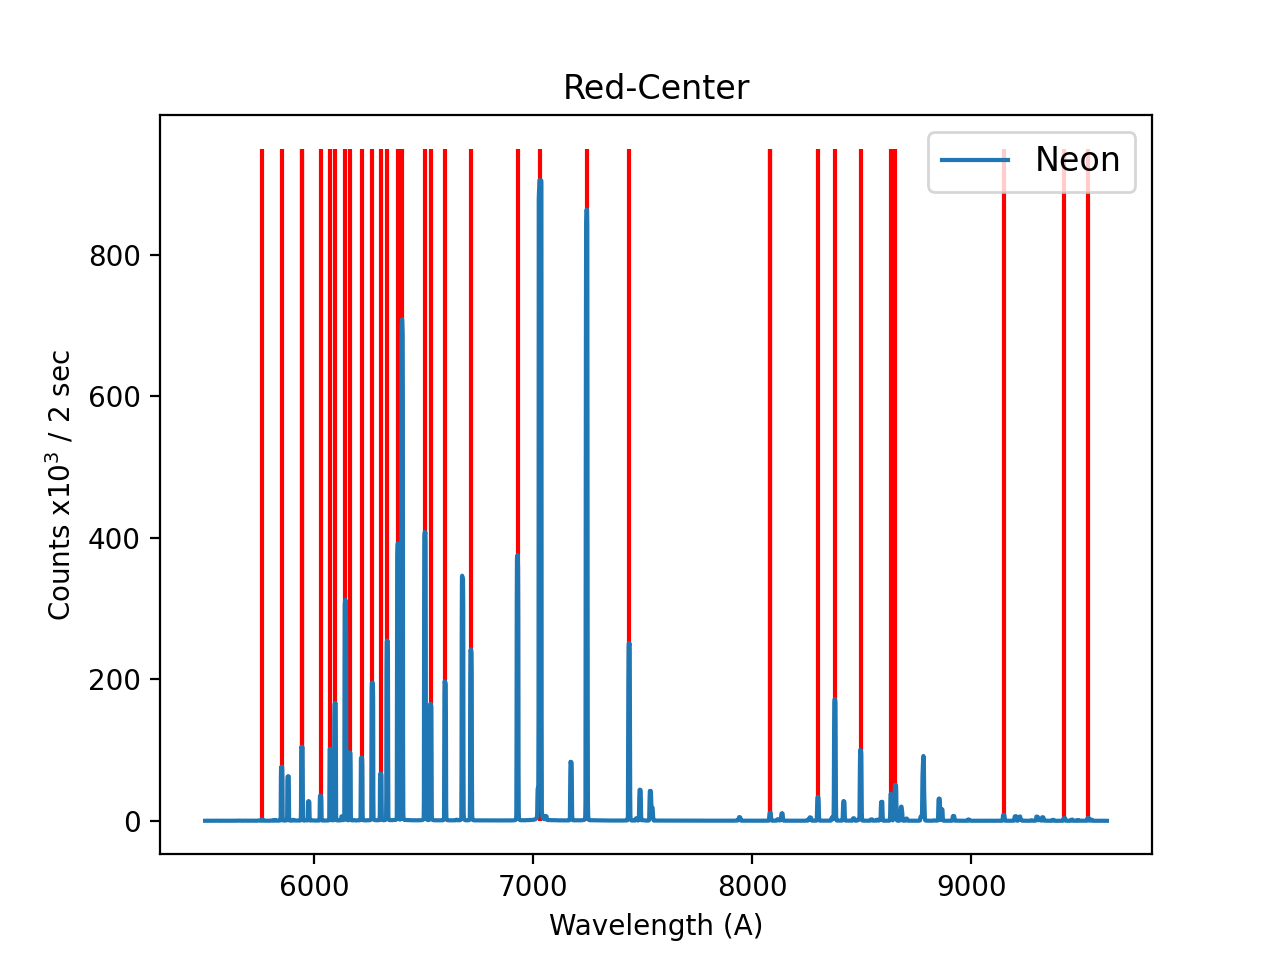

Text(0.5, 1.0, 'Red-Center')

In [6]:
# then I hand-identified a BUNCH of lines, fit the solution w/ a GP, and now we have a template saved!
# arc_fitg, var = kosmos.fit_wavelength(ex_k, xpts012, wpts012*u.angstrom,
#                                       mode='gp', display=False, returnvar=True)
df_line = pd.read_csv('int_neon_bd28_4211.0001.lines')
df_spec = pd.read_csv('red_center_Neon_gp.spec')

red_cent = Spectrum1D(spectral_axis=df_spec['wave'].values * u.angstrom,
                      flux=df_spec['flux'].values * u.adu)

plt.plot(df_spec['wave'], df_spec['flux'], label='Neon')
plt.vlines(df_line['wpts'], 0, 950, color='r')

plt.xlabel('Wavelength (A)')
plt.legend(fontsize=12)
plt.ylabel('Counts x10$^3$ / 2 sec')
plt.title('Red-Center')

In [7]:
# Red-High
# int_neon_bd28_4211.0002.fits
img_k = kosmos.proc('int_neon_bd28_4211.0002.fits', bias=bias, trim=False, Waxis=0)
ex_k2, _ = kosmos.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
Fout2 =  ex_k2.flux.value
# plt.plot(Fout/1000)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


<IPython.core.display.Javascript object>


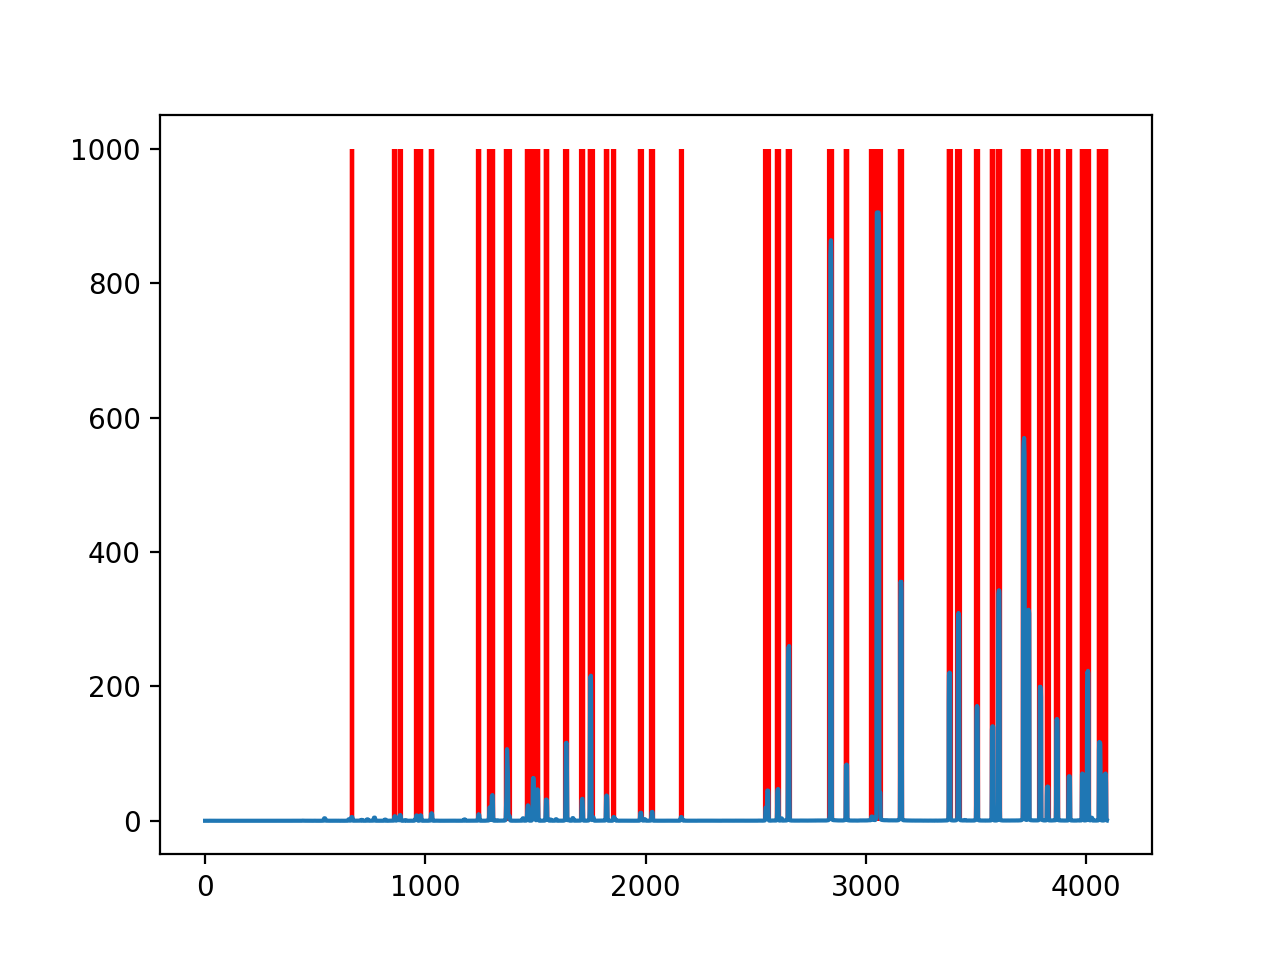

In [8]:
xt2,wt2 = kosmos.identify_dtw(ex_k2, red_cent, upsample=False, 
                            open_begin=True, open_end=True, step_pattern='asymmetric',
                            display=False, peak_spline=True, pthreshold=0.9)

plt.plot(Fout2/1000)
plt.vlines(xt2, 0,1000, color='r')

arc_fitg2, var2 = kosmos.fit_wavelength(ex_k2, xt2, wt2,
                                        mode='gp', display=False, returnvar=True)

In [9]:
# Red-Low
# int_neon_bd28_4211.0003.fits

img_k = kosmos.proc('int_neon_bd28_4211.0003.fits', bias=bias, trim=False, Waxis=0)
ex_k3, _ = kosmos.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
Fout3 =  ex_k3.flux.value
# plt.plot(Fout/1000)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


<IPython.core.display.Javascript object>


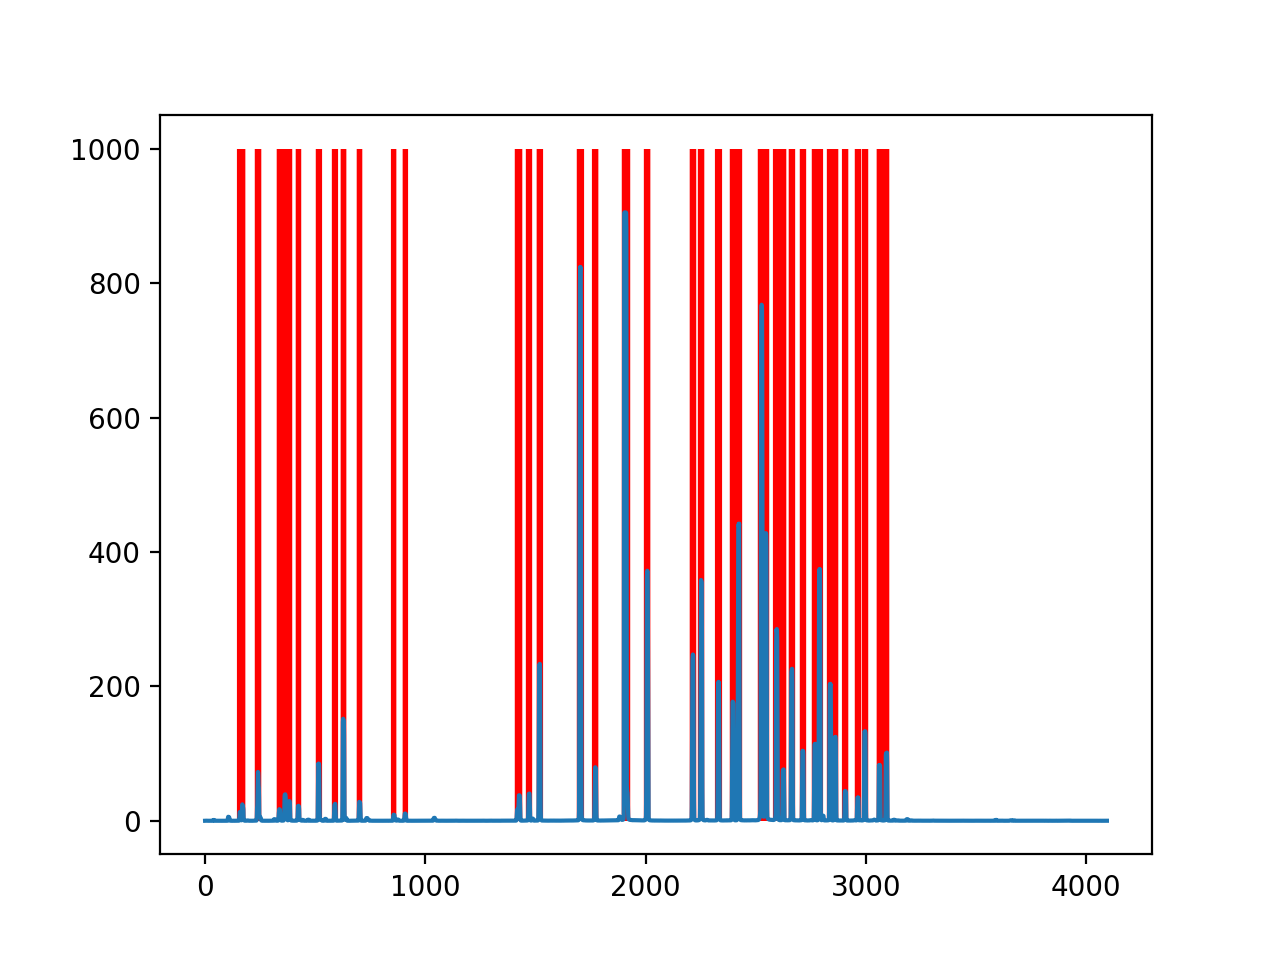

In [10]:
xt3,wt3 = kosmos.identify_dtw(ex_k3, red_cent, upsample=False, 
                            open_begin=True, open_end=True, step_pattern='asymmetric',
                            display=False, peak_spline=True, pthreshold=0.9)

plt.plot(Fout3/1000)
plt.vlines(xt3, 0,1000, color='r')

arc_fitg3, var3 = kosmos.fit_wavelength(ex_k3, xt3, wt3,
                                        mode='gp', display=False, returnvar=True)

<IPython.core.display.Javascript object>


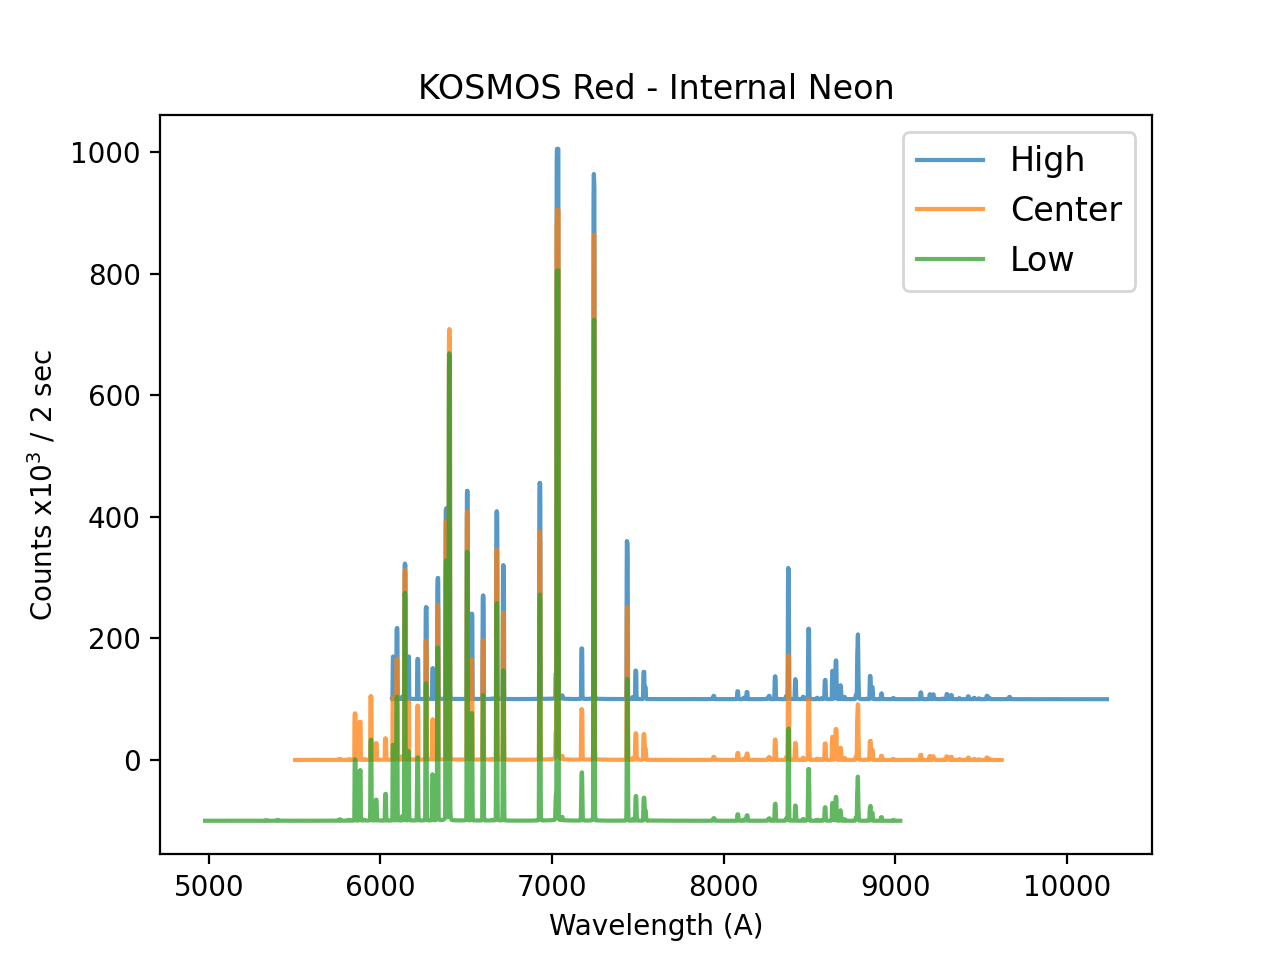

In [248]:
plt.plot(arc_fitg2.spectral_axis, arc_fitg2.flux.value/1000+100, alpha=0.75, label='High')
plt.plot(df_spec['wave'], df_spec['flux'], alpha=0.75, label='Center')
plt.plot(arc_fitg3.spectral_axis, arc_fitg3.flux.value/1000-100, alpha=0.75, label='Low')
plt.xlabel('Wavelength (A)')
plt.legend(fontsize=12)
plt.ylabel('Counts x10$^3$ / 2 sec')
plt.title('KOSMOS Red - Internal Neon')
plt.savefig('red_neon_templates.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

<IPython.core.display.Javascript object>


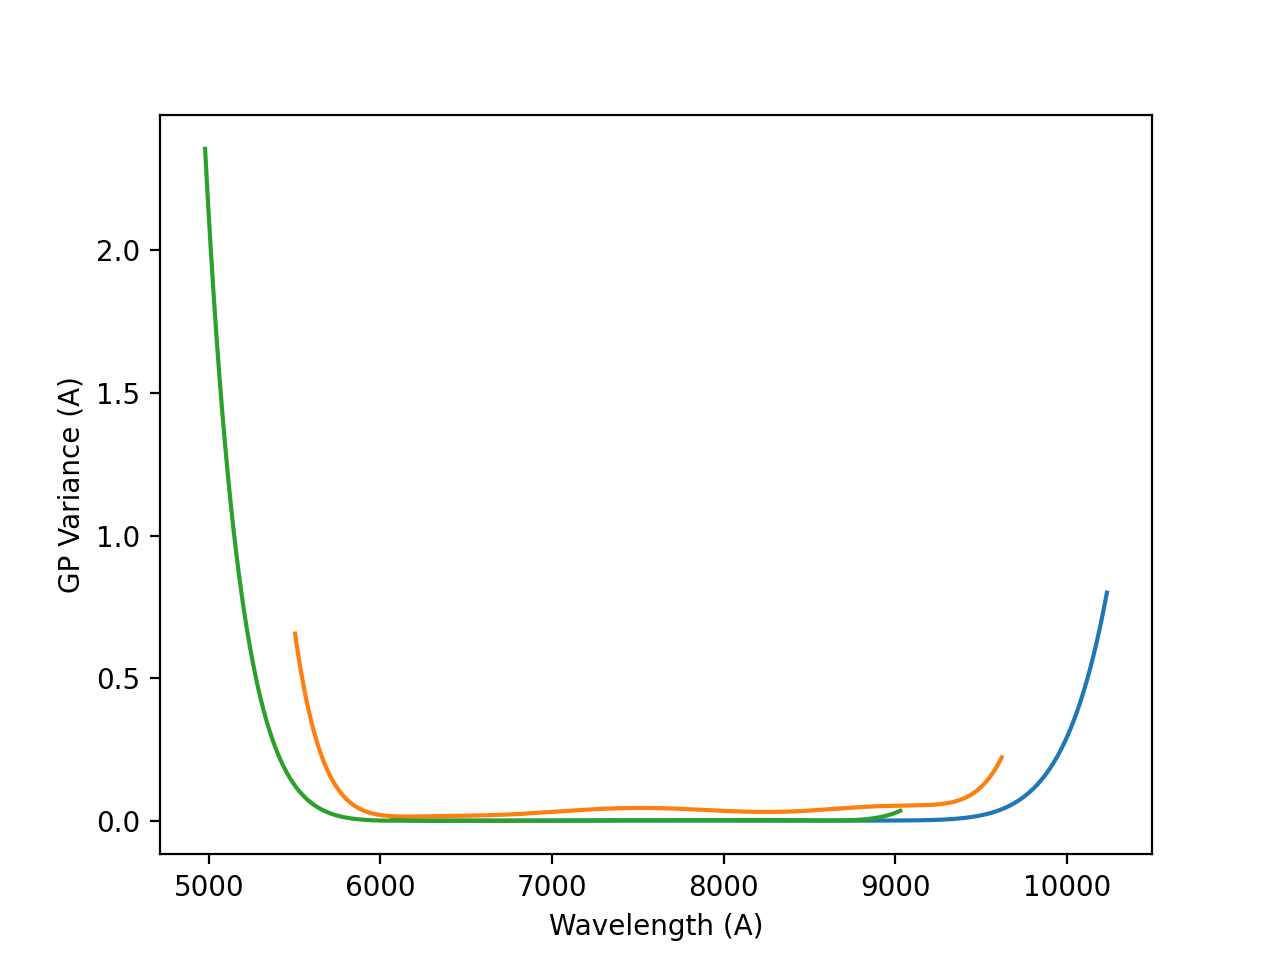

Text(0, 0.5, 'GP Variance (A)')

In [12]:
plt.plot(arc_fitg2.spectral_axis, var2)
plt.plot(df_spec['wave'], df_spec['wave_var'])
plt.plot(arc_fitg3.spectral_axis, var3)
plt.xlabel('Wavelength (A)')
plt.ylabel('GP Variance (A)')

In [13]:
# The old IRAF-style linelists just have 2 col: (wavelength, line name)
line_file = '/Users/james/Dropbox/research_projects/kosmos/kosmos/resources/linelists/apohenear.dat'
henear_tbl = Table.read(line_file, 
                        names=('wave', 'name'), format='ascii')

henear_tbl['wave'].unit = u.angstrom
apo_henear = henear_tbl['wave']
# apo_henear

In [14]:
idhenear_file = '/Users/james/Dropbox/research_projects/kosmos/kosmos/resources/linelists/idhenearT.dat'
idhenear = pd.read_table(idhenear_file, delimiter='\t', names=('wave', 'line'), comment='#')
# idhenear['line'].str.contains('Ne')

<IPython.core.display.Javascript object>


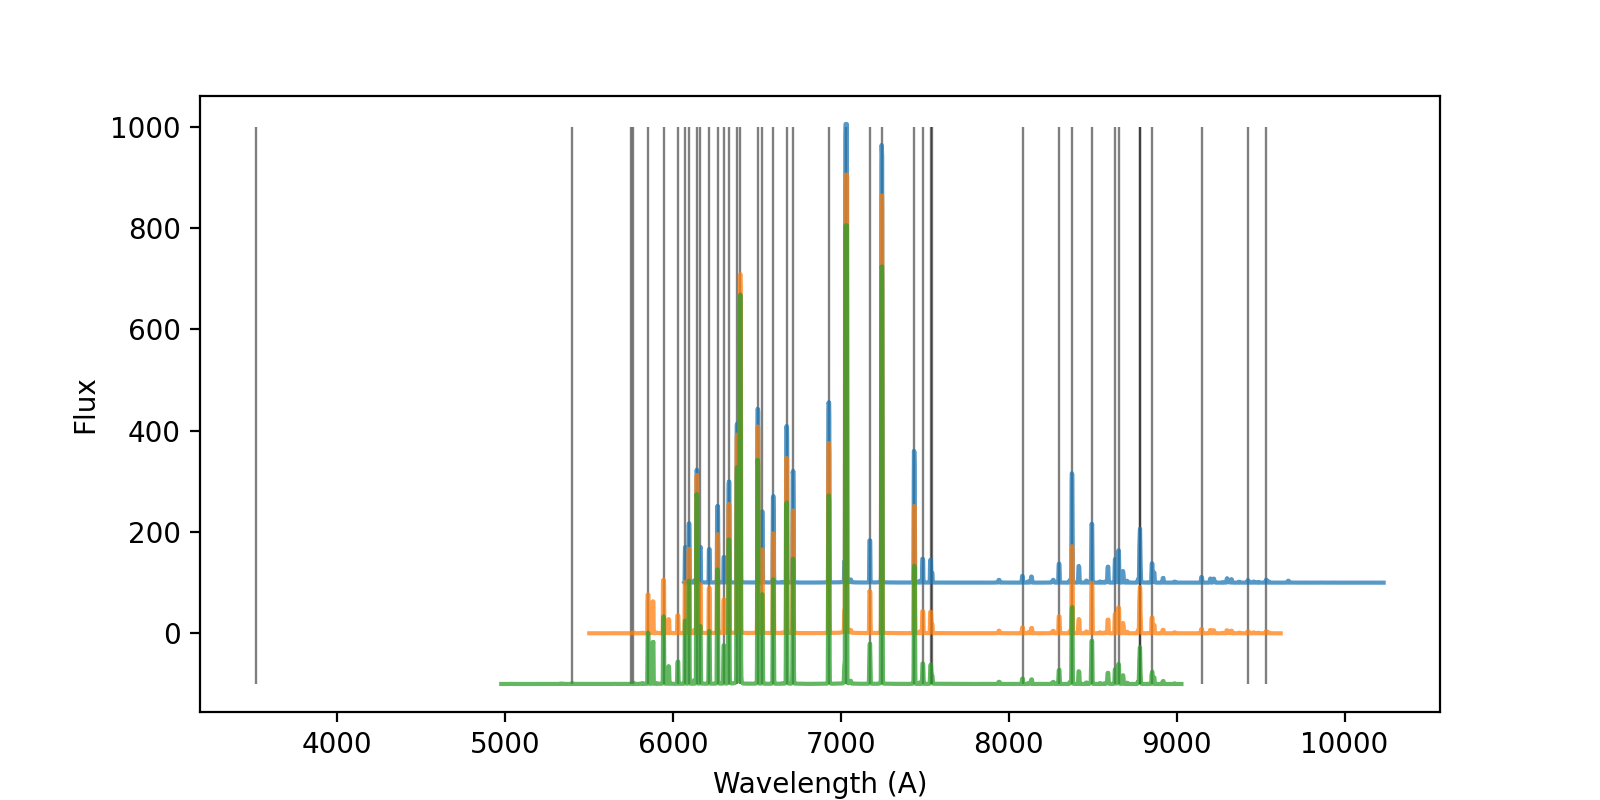

Text(0, 0.5, 'Flux')

In [15]:
# double-check the actual lines I identified!
plt.figure(figsize=(8,4))
plt.vlines(idhenear['wave'][idhenear['line'].str.contains('Ne')], -100, 1000, color='k', lw=0.85, alpha=.5)

plt.plot(arc_fitg2.spectral_axis, arc_fitg2.flux.value/1000+100, alpha=0.75, label='High')
plt.plot(df_spec['wave'], df_spec['flux'], alpha=0.75, label='Center')
plt.plot(arc_fitg3.spectral_axis, arc_fitg3.flux.value/1000-100, alpha=0.75, label='Low')

# plt.vlines(apo_henear[henear_tbl['name']=='Ne'], -100, 1000, color='purple', ls='--')
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
/Users/james/Dropbox/research_projects/kosmos/kosmos/apextract.py:316: RuntimeWarning: invalid value encountered in sqrt
  fluxerr[i] = np.sqrt(np.nansum((onedspec[i]-skysubflux[i])) +


<IPython.core.display.Javascript object>


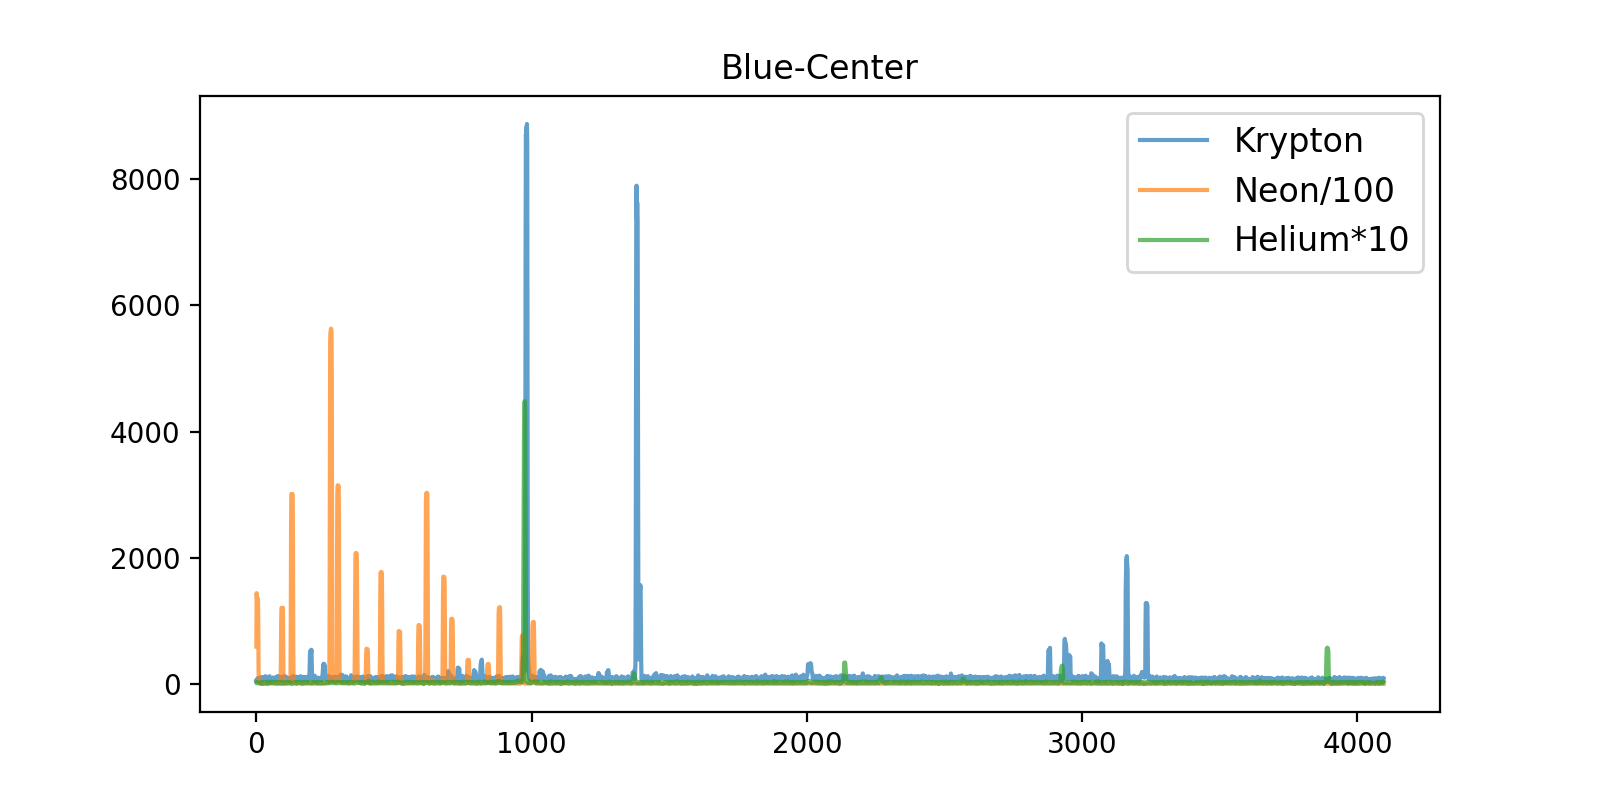

Text(0.5, 1.0, 'Blue-Center')

In [92]:
# Blue-Center
# truss_neon_gd71.0002.fits
# truss_helium_gd71.0003.fits
# int_kry_gd71.0002.fits
# int_neon_gd71.0002.fits


img_1 = kosmos.proc('int_kry_gd71.0002.fits', bias=bias, trim=False, Waxis=0)
ex_1, _ = kosmos.BoxcarExtract(img_1, trace, apwidth=3, Waxis=0)

img_2 = kosmos.proc('int_neon_gd71.0002.fits', bias=bias, trim=False, Waxis=0)
ex_2, _ = kosmos.BoxcarExtract(img_2, trace, apwidth=3, Waxis=0)

img_3 = kosmos.proc('truss_helium_gd71.0003.fits', bias=bias, trim=False, Waxis=0)
ex_3, _ = kosmos.BoxcarExtract(img_3, trace, apwidth=3, Waxis=0)

plt.figure(figsize=(8,4))
plt.plot(ex_1.spectral_axis, ex_1.flux, label='Krypton', alpha=0.7)
plt.plot(ex_2.spectral_axis, ex_2.flux/100, label='Neon/100', alpha=0.7)
plt.plot(ex_3.spectral_axis, ex_3.flux*10, label='Helium*10', alpha=0.7)
plt.legend(fontsize=12)
plt.title('Blue-Center')

In [48]:
# df_out = pd.DataFrame(data={'xpts':xb1, 'wpts':wb1})
# df_out.to_csv('int_kry_gd71.0002.lines', index=False, index_label=False)

# df_out = pd.DataFrame(data={'xpts':xb2, 'wpts':wb2})
# df_out.to_csv('int_neon_gd71.0002.lines', index=False, index_label=False)

# df_out = pd.DataFrame(data={'xpts':xb3, 'wpts':wb3})
# df_out.to_csv('truss_helium_gd71.0003.lines', index=False, index_label=False)

In [51]:
df1 = pd.read_csv('int_kry_gd71.0002.lines')
df2 = pd.read_csv('int_neon_gd71.0002.lines')
df3 = pd.read_csv('truss_helium_gd71.0003.lines')

xb123 = np.concatenate((df1['xpts'].values, df2['xpts'].values, df3['xpts'].values))
wb123 = np.concatenate((df1['wpts'].values, df2['wpts'].values, df3['wpts'].values))

ss = np.argsort(wb123)
xb123 = xb123[ss]
wb123 = wb123[ss] * u.angstrom

In [91]:
arc_1bc, var1bc = kosmos.fit_wavelength(ex_1, xb123, wb123 , mode='gp', display=False, 
                                      returnvar=True, GPRscale=101)

arc_2bc, var2bc = kosmos.fit_wavelength(ex_2, xb123, wb123 , mode='gp', display=False, 
                                      returnvar=True, GPRscale=101)

arc_3bc, var3bc = kosmos.fit_wavelength(ex_3, xb123, wb123 , mode='gp', display=False, 
                                      returnvar=True, GPRscale=101)

df_out = pd.DataFrame(data={'wave':arc_1bc.spectral_axis.value,'wave_var':var1bc,'flux':arc_1bc.flux.value})
df_out.to_csv('blue_center_Krypton_gp.spec', index=False, index_label=False)

df_out = pd.DataFrame(data={'wave':arc_2bc.spectral_axis.value,'wave_var':var2bc,'flux':arc_2bc.flux.value})
df_out.to_csv('blue_center_Neon_gp.spec', index=False, index_label=False)

df_out = pd.DataFrame(data={'wave':arc_3bc.spectral_axis.value,'wave_var':var3bc,'flux':arc_3bc.flux.value})
df_out.to_csv('blue_center_Helium_gp.spec', index=False, index_label=False)

<IPython.core.display.Javascript object>


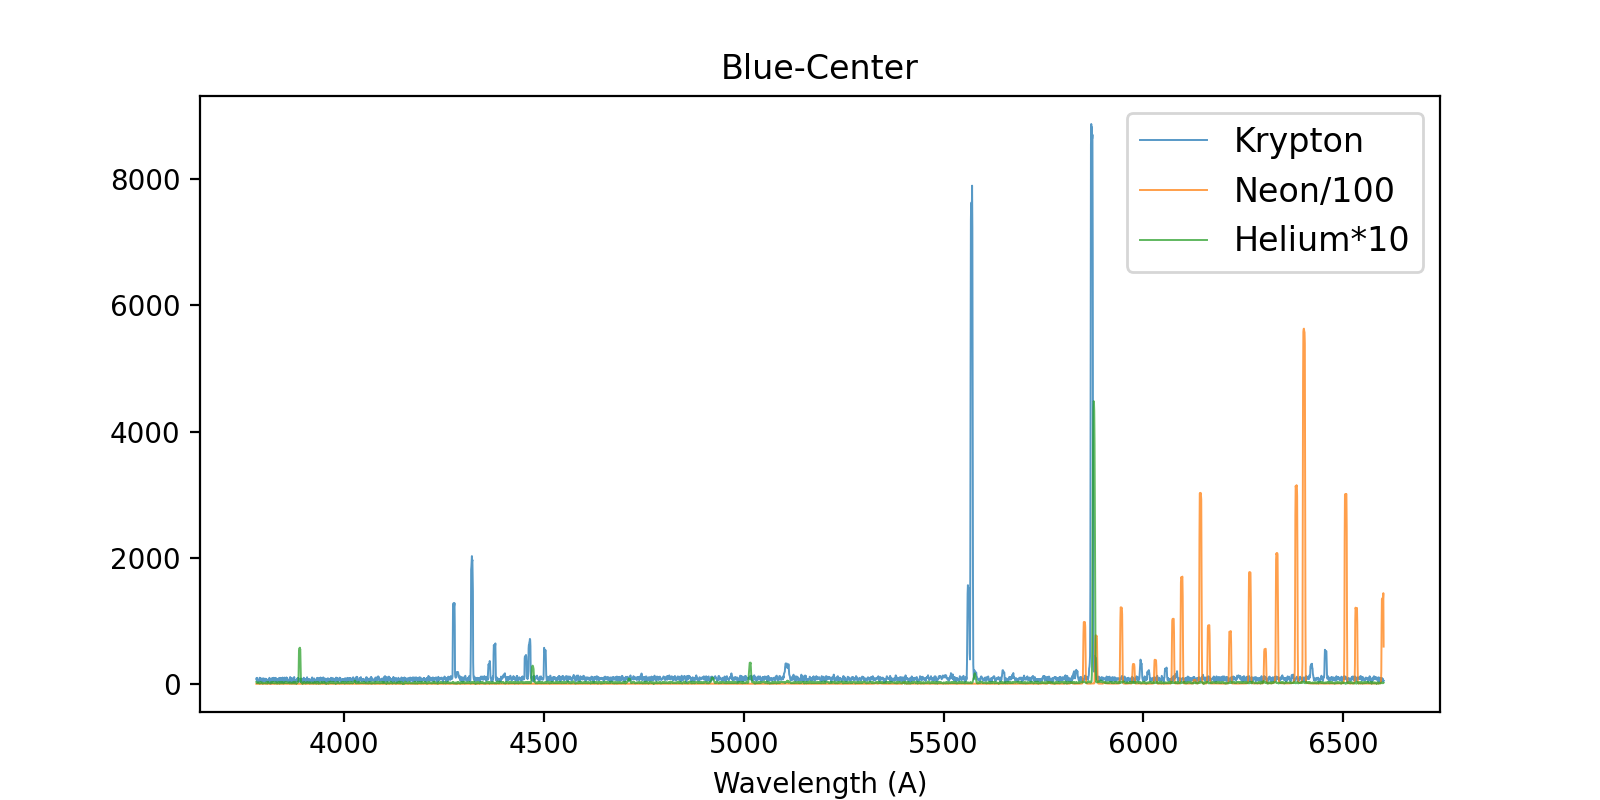

In [247]:
plt.figure(figsize=(8,4))
plt.plot(arc_1bc.spectral_axis, arc_1bc.flux, label='Krypton', alpha=0.75, lw=0.7)
plt.plot(arc_2bc.spectral_axis, arc_2bc.flux/100, label='Neon/100', alpha=0.75, lw=0.7)
plt.plot(arc_3bc.spectral_axis, arc_3bc.flux*10, label='Helium*10', alpha=0.75, lw=0.7)
plt.legend(fontsize=12)
plt.title('Blue-Center')
plt.xlabel('Wavelength (A)')
plt.savefig('blue_center_templates.png', dpi=250, bbox_inches='tight', pad_inches=0.25)

<IPython.core.display.Javascript object>


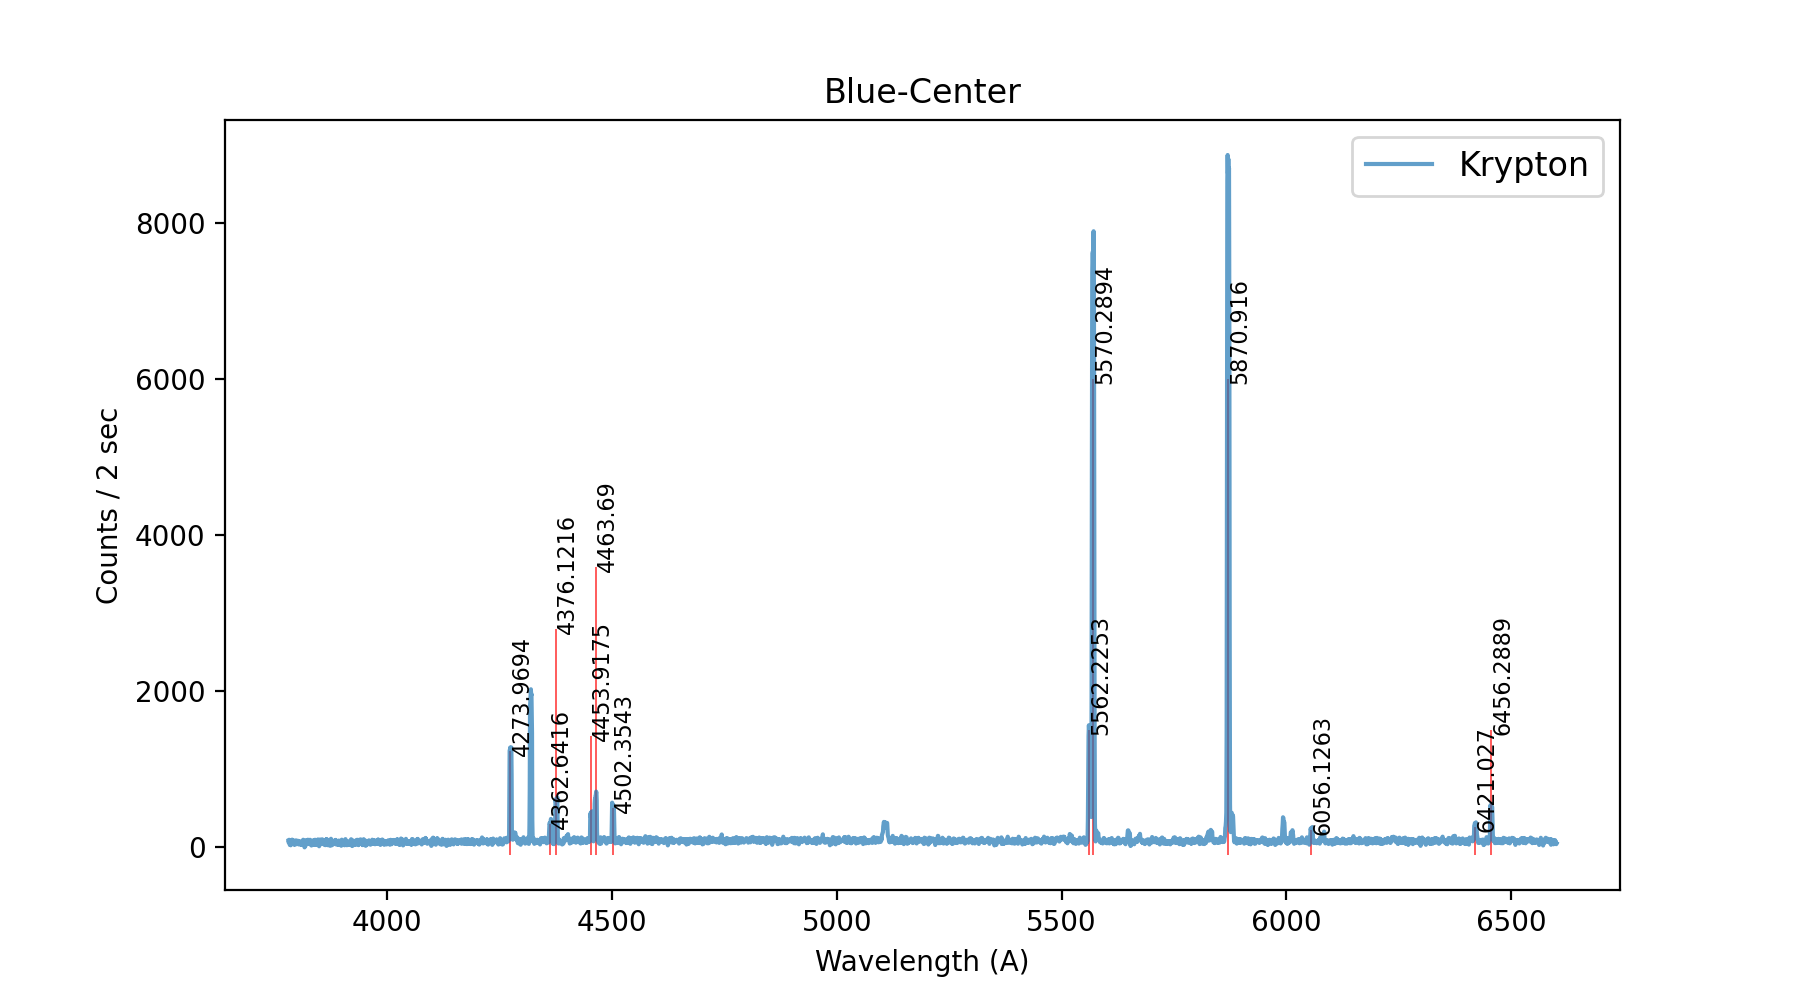

In [88]:
# from https://physics.nist.gov/PhysRefData/Handbook/Tables/kryptontable2.htm
# using HeNe as prelim calibration (quite good already)
KrI = [4273.9694, 4362.6416, 4376.1216, 4453.9175, 4463.6900, 4502.3543, 
       5562.2253, 5570.2894, 5870.9160, 6056.1263, 6421.0270, 6456.2889]

plt.figure(figsize=(9,5))
plt.plot(arc_1bc.spectral_axis, arc_1bc.flux, label='Krypton', alpha=0.7)
plt.title('Blue-Center')
plt.xlabel('Wavelength (A)')
plt.legend(fontsize=12)
plt.ylabel('Counts / 2 sec')

# KrI_amp = np.interp(KrI, arc_1bc.spectral_axis.value[::-1], arc_1bc.flux.value[::-1])
KrI_A = [1230, 300, 2800, 1420, 3600, 500, 1500, 6000, 6000, 220, 260, 1500]
for k in range(len(KrI)):
    plt.text(KrI[k], KrI_A[k], str(KrI[k]), fontsize=8, rotation='vertical', color='k')
plt.vlines(KrI, -100, KrI_A, color='r', lw=0.6, alpha=0.75)

plt.savefig('blue_kr_templates.png', dpi=250, bbox_inches='tight', pad_inches=0.25)

<IPython.core.display.Javascript object>


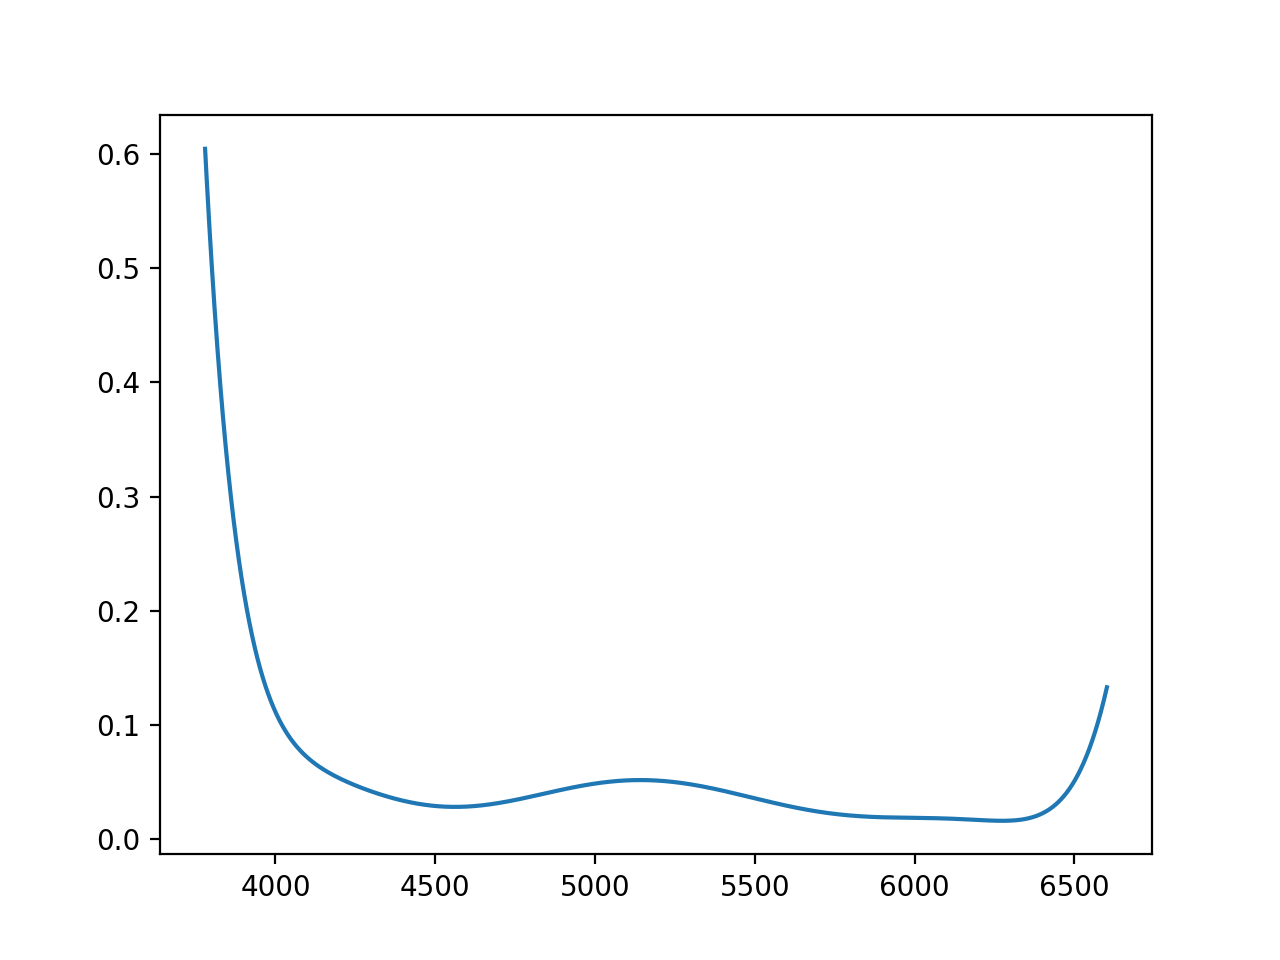

In [102]:
plt.plot(arc_1bc.spectral_axis, var1bc)
# plt.plot(arc_2bc.spectral_axis, var2bc)
# plt.plot(arc_3bc.spectral_axis, var3bc)

In [191]:
# our blue template
df_spec1 = pd.read_csv('blue_center_Krypton_gp.spec')
df_spec2 = pd.read_csv('blue_center_Neon_gp.spec')
df_spec3 = pd.read_csv('blue_center_Helium_gp.spec')

# make it w/ just Kr and Ne (internals), and scale Neon/100
blue_cent = Spectrum1D(spectral_axis=df_spec1['wave'].values * u.angstrom,
                       flux=(df_spec1['flux'].values + (df_spec2['flux'].values/100)) * u.adu)


In [230]:
# plt.plot(red_cent.spectral_axis, red_cent.flux.value*10, c='C3', alpha=0.75)
# plt.plot(blue_cent.spectral_axis, blue_cent.flux, alpha=0.75, c='C0')

# combine red and blue channels to make a wider template!
rok = (red_cent.spectral_axis.value > np.nanmax(blue_cent.spectral_axis.value)) & (red_cent.spectral_axis.value < 7500)
blue_red = Spectrum1D(spectral_axis = np.concatenate((red_cent.spectral_axis.value[rok], 
                                                      blue_cent.spectral_axis.value))*u.angstrom, 
                      flux =  np.concatenate((red_cent.flux.value[rok] * 10, 
                                              blue_cent.flux.value))*u.adu )
# plt.plot(blue_red.spectral_axis, blue_red.flux, c='C2')


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
/Users/james/Dropbox/research_projects/kosmos/kosmos/apextract.py:316: RuntimeWarning: invalid value encountered in sqrt
  fluxerr[i] = np.sqrt(np.nansum((onedspec[i]-skysubflux[i])) +
/Users/james/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:2559: RuntimeWarning: invalid value encountered in true_divide
  norm_distances.append((x - grid[i]) /


<IPython.core.display.Javascript object>


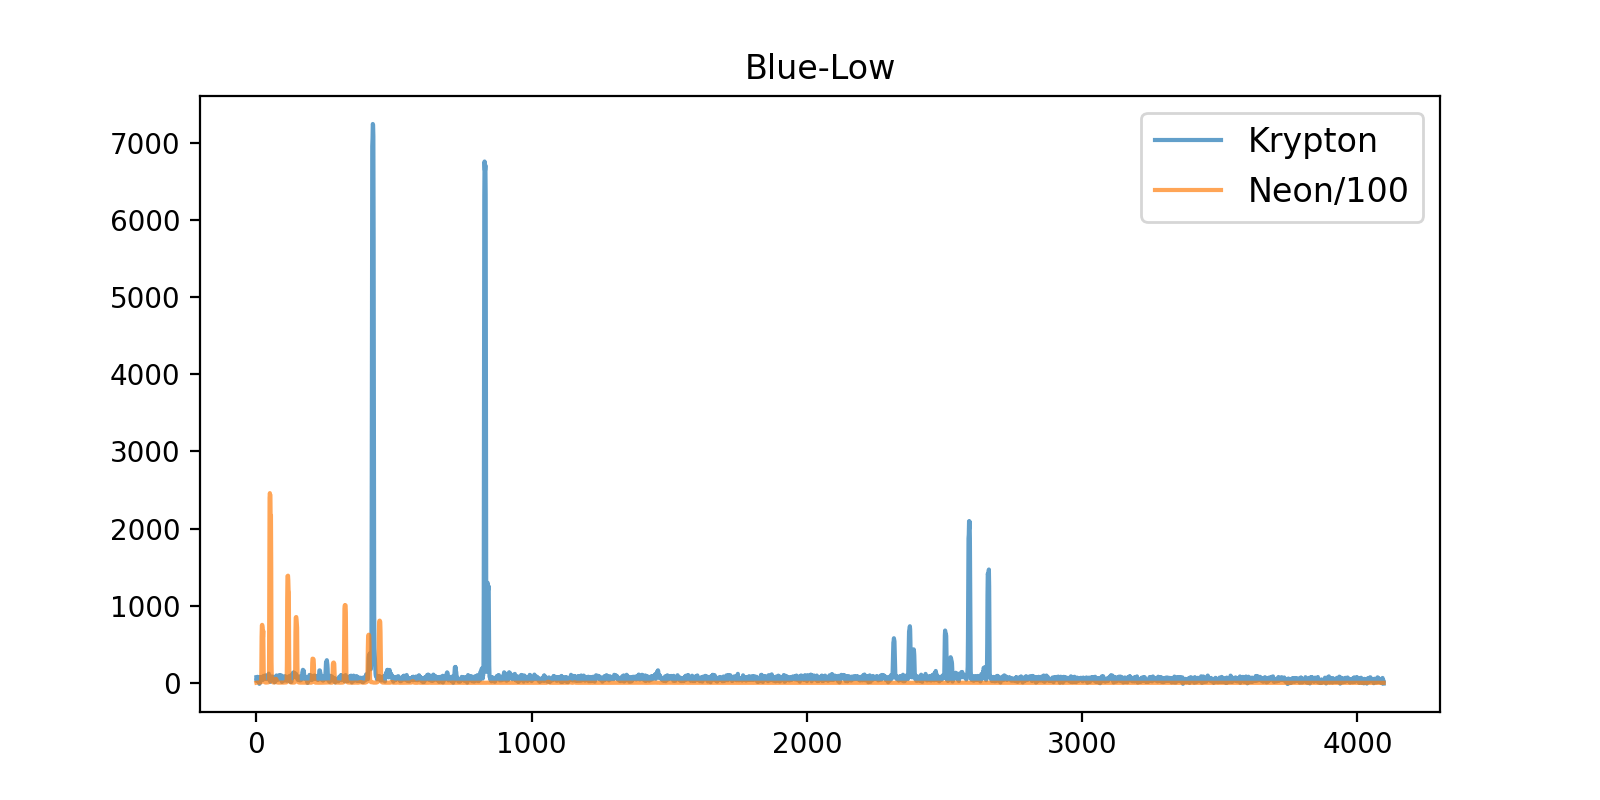

Text(0.5, 1.0, 'Blue-Low')

In [268]:
# Blue-low
# int_neon_bd28_4211.0004.fits
# int_kry_bd28_4211.0001.fits
# int_neon_gd71.0001.fits
# int_kry_gd71.0001.fits
# truss_neon_gd71.0001.fits

img_1 = kosmos.proc('int_kry_gd71.0001.fits', bias=bias, trim=False, Waxis=0)
ex_1l, _ = kosmos.BoxcarExtract(img_1, trace, apwidth=3, Waxis=0)

img_2 = kosmos.proc('int_neon_gd71.0001.fits', bias=bias, trim=False, Waxis=0)
ex_2l, _ = kosmos.BoxcarExtract(img_2, trace, apwidth=3, Waxis=0)

# we oops the He on this one, it's Blue-Center here too
# img_3 = kosmos.proc('truss_helium_gd71.0002.fits', bias=bias, trim=False, Waxis=0)
# ex_3, _ = kosmos.BoxcarExtract(img_3, trace, apwidth=3, Waxis=0)

ex_bl =(ex_2l/100)
ex_bl = ex_bl + ex_1l

plt.figure(figsize=(8,4))
plt.plot(ex_1l.spectral_axis, ex_1l.flux, label='Krypton', alpha=0.7)
plt.plot(ex_2l.spectral_axis, ex_2l.flux/100, label='Neon/100', alpha=0.7)
# plt.plot(ex_3.spectral_axis, ex_3.flux*100, label='Helium*100', alpha=0.7)
plt.legend(fontsize=12)
plt.title('Blue-Low')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
/Users/james/Dropbox/research_projects/kosmos/kosmos/apextract.py:316: RuntimeWarning: invalid value encountered in sqrt
  fluxerr[i] = np.sqrt(np.nansum((onedspec[i]-skysubflux[i])) +
/Users/james/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:2559: RuntimeWarning: invalid value encountered in true_divide
  norm_distances.append((x - grid[i]) /


<IPython.core.display.Javascript object>


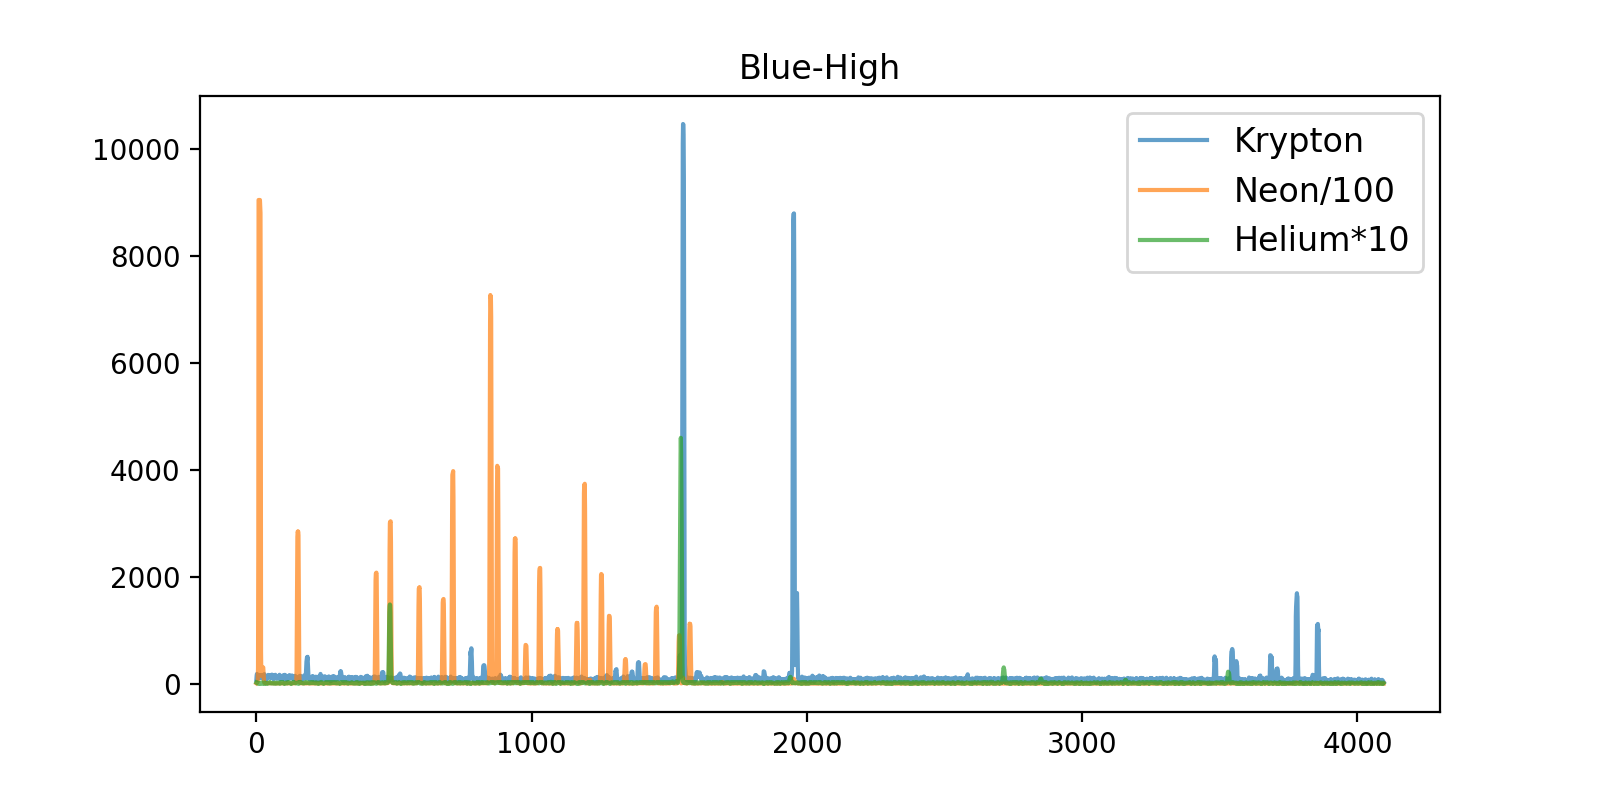

Text(0.5, 1.0, 'Blue-High')

In [269]:
# Blue-High
# truss_helium_gd71.0004.fits
# truss_neon_gd71.0004.fits
# int_kryp_gd71.0001.fits
# int_neon_gd71.0003.fits

img_1 = kosmos.proc('int_kryp_gd71.0001.fits', bias=bias, trim=False, Waxis=0)
ex_1h, _ = kosmos.BoxcarExtract(img_1, trace, apwidth=3, Waxis=0)

img_2 = kosmos.proc('int_neon_gd71.0003.fits', bias=bias, trim=False, Waxis=0)
ex_2h, _ = kosmos.BoxcarExtract(img_2, trace, apwidth=3, Waxis=0)

img_3 = kosmos.proc('truss_helium_gd71.0004.fits', bias=bias, trim=False, Waxis=0)
ex_3h, _ = kosmos.BoxcarExtract(img_3, trace, apwidth=3, Waxis=0)

ex_bh =(ex_2h/100)
ex_bh = ex_bh + ex_1h

plt.figure(figsize=(8,4))
plt.plot(ex_1h.spectral_axis, ex_1h.flux, label='Krypton', alpha=0.7)
plt.plot(ex_2h.spectral_axis, ex_2h.flux/100, label='Neon/100', alpha=0.7)
plt.plot(ex_3h.spectral_axis, ex_3h.flux*10, label='Helium*10', alpha=0.7)
plt.legend(fontsize=12)
plt.title('Blue-High')

<IPython.core.display.Javascript object>


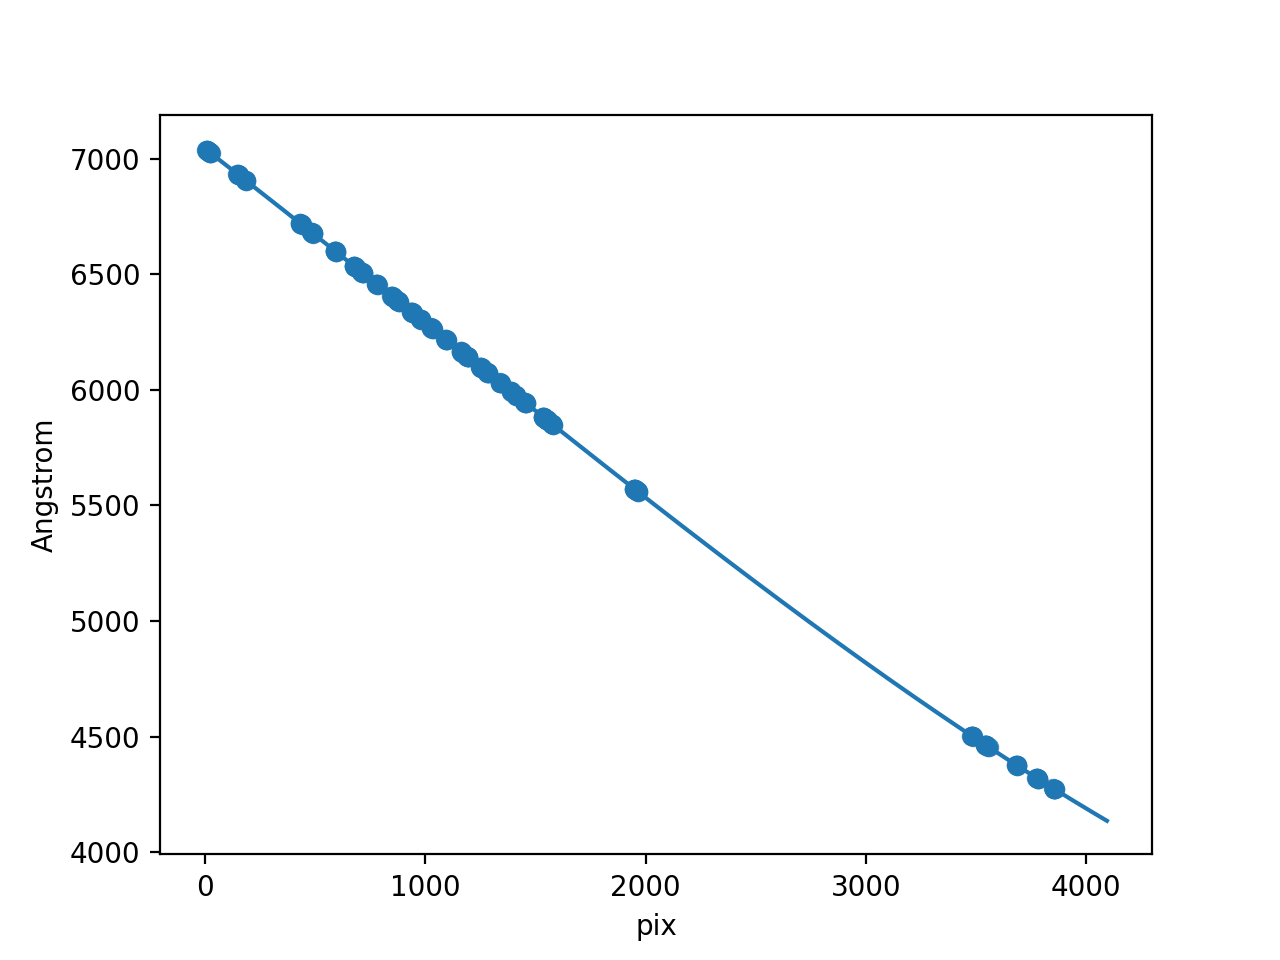

In [270]:
xbl,wbl = kosmos.identify_dtw(ex_bl, blue_cent, upsample=False, 
                            open_begin=True, open_end=True, step_pattern='asymmetric',
                            display=False, peak_spline=True, pthreshold=0.93)

arc_bl, var_bl= kosmos.fit_wavelength(ex_bl, xbl, wbl, mode='gp', display=False, 
                                      returnvar=True, GPRscale=101)

# use the blue-red combined template here, since we have features we're missing in the blue-center
xbh,wbh = kosmos.identify_dtw(ex_bh, blue_red, upsample=False, 
                            open_begin=True, open_end=True, step_pattern='asymmetric',
                            display=True, peak_spline=True, pthreshold=0.93)

arc_bh, var_bh= kosmos.fit_wavelength(ex_bh, xbh, wbh, mode='gp', display=False, 
                                      returnvar=True, GPRscale=101)

<IPython.core.display.Javascript object>


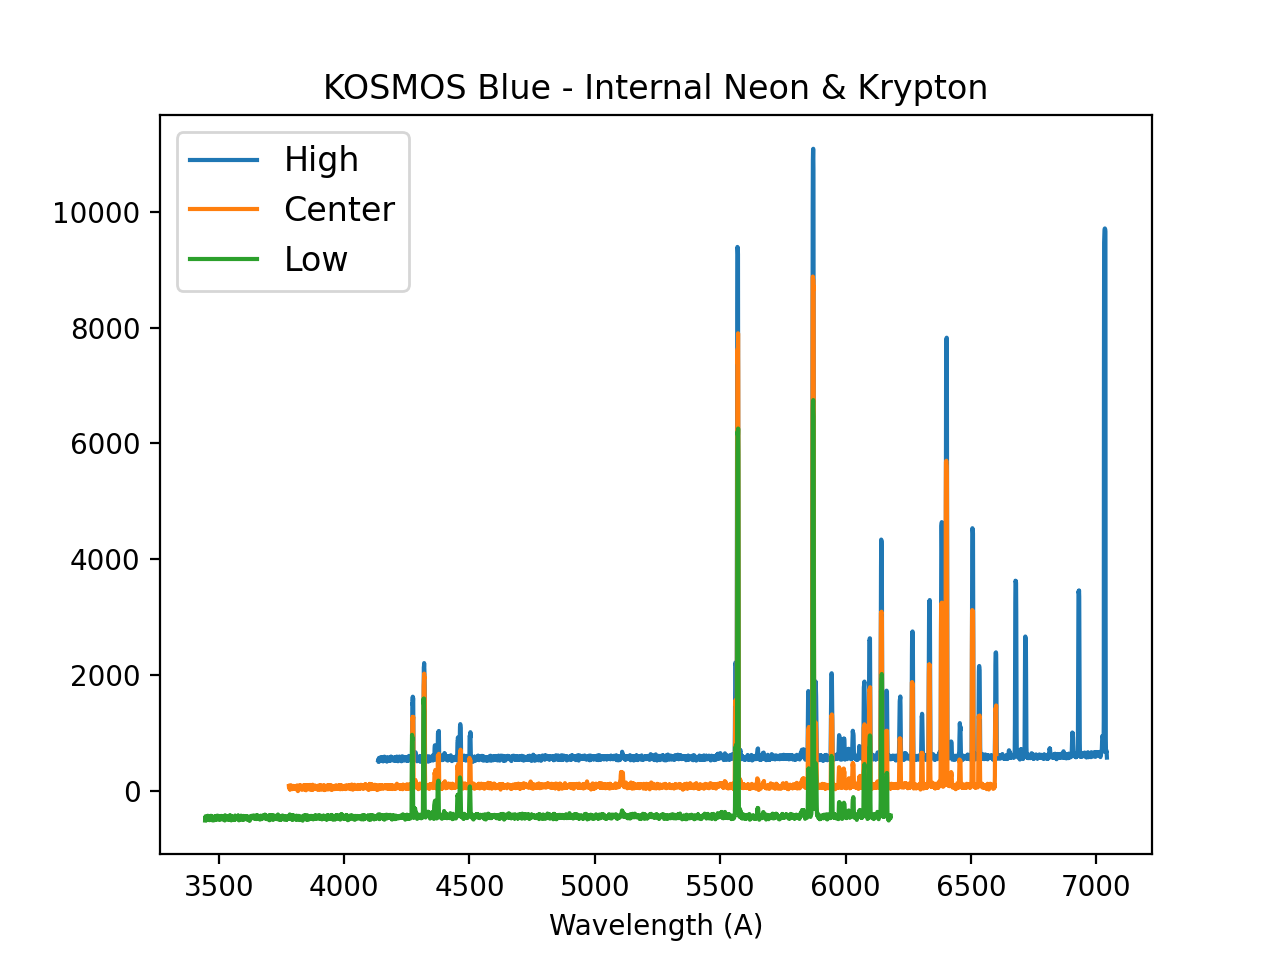

Text(0.5, 1.0, 'KOSMOS Blue - Internal Neon & Krypton')

In [272]:
plt.plot(arc_bh.spectral_axis, arc_bh.flux.value+500, label='High')
plt.plot(blue_cent.spectral_axis, blue_cent.flux, label='Center')
plt.plot(arc_bl.spectral_axis, arc_bl.flux.value-500, label='Low')

plt.xlabel('Wavelength (A)')
plt.legend(fontsize=12)
# plt.ylabel('Counts x10$^3$ / 2 sec')
plt.title('KOSMOS Blue - Internal Neon & Krypton')
# plt.savefig('blue_nekr_templates.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [273]:
df_outbl1 = pd.DataFrame(data={'wave':arc_bl.spectral_axis.value,'wave_var':var_bl,'flux':ex_1l.flux.value})
df_outbl1.to_csv('blue_low_Krypton_gp.spec', index=False, index_label=False)

df_outbl2 = pd.DataFrame(data={'wave':arc_bl.spectral_axis.value,'wave_var':var_bl,'flux':ex_2l.flux.value})
df_outbl2.to_csv('blue_low_Neon_gp.spec', index=False, index_label=False)


<IPython.core.display.Javascript object>


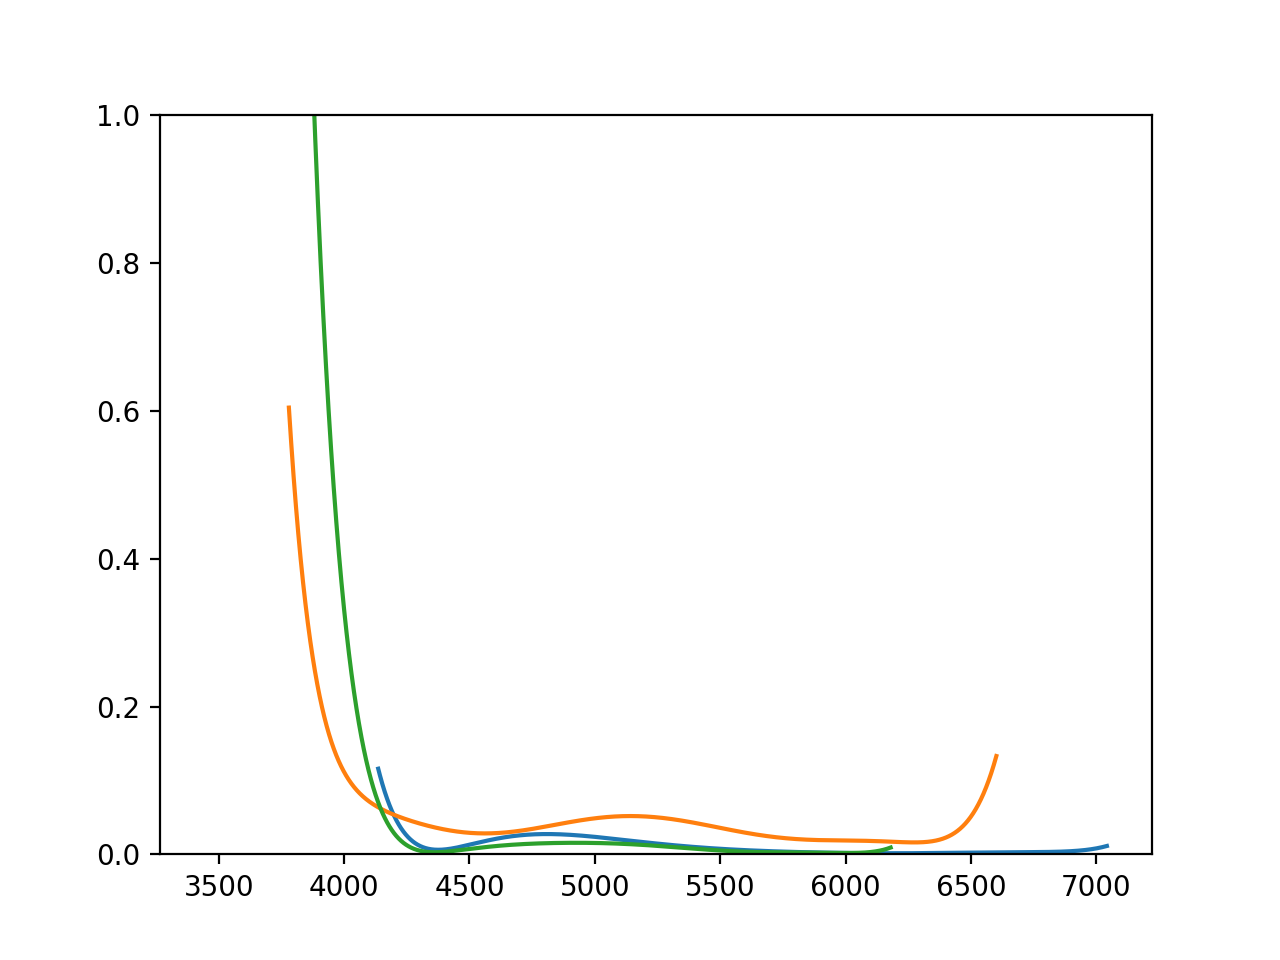

(0.0, 1.0)

In [229]:
plt.plot(arc_bh.spectral_axis, var_bh)
plt.plot(arc_1bc.spectral_axis, var1bc)
plt.plot(arc_bl.spectral_axis, var_bl)
plt.ylim(0,1)

<IPython.core.display.Javascript object>


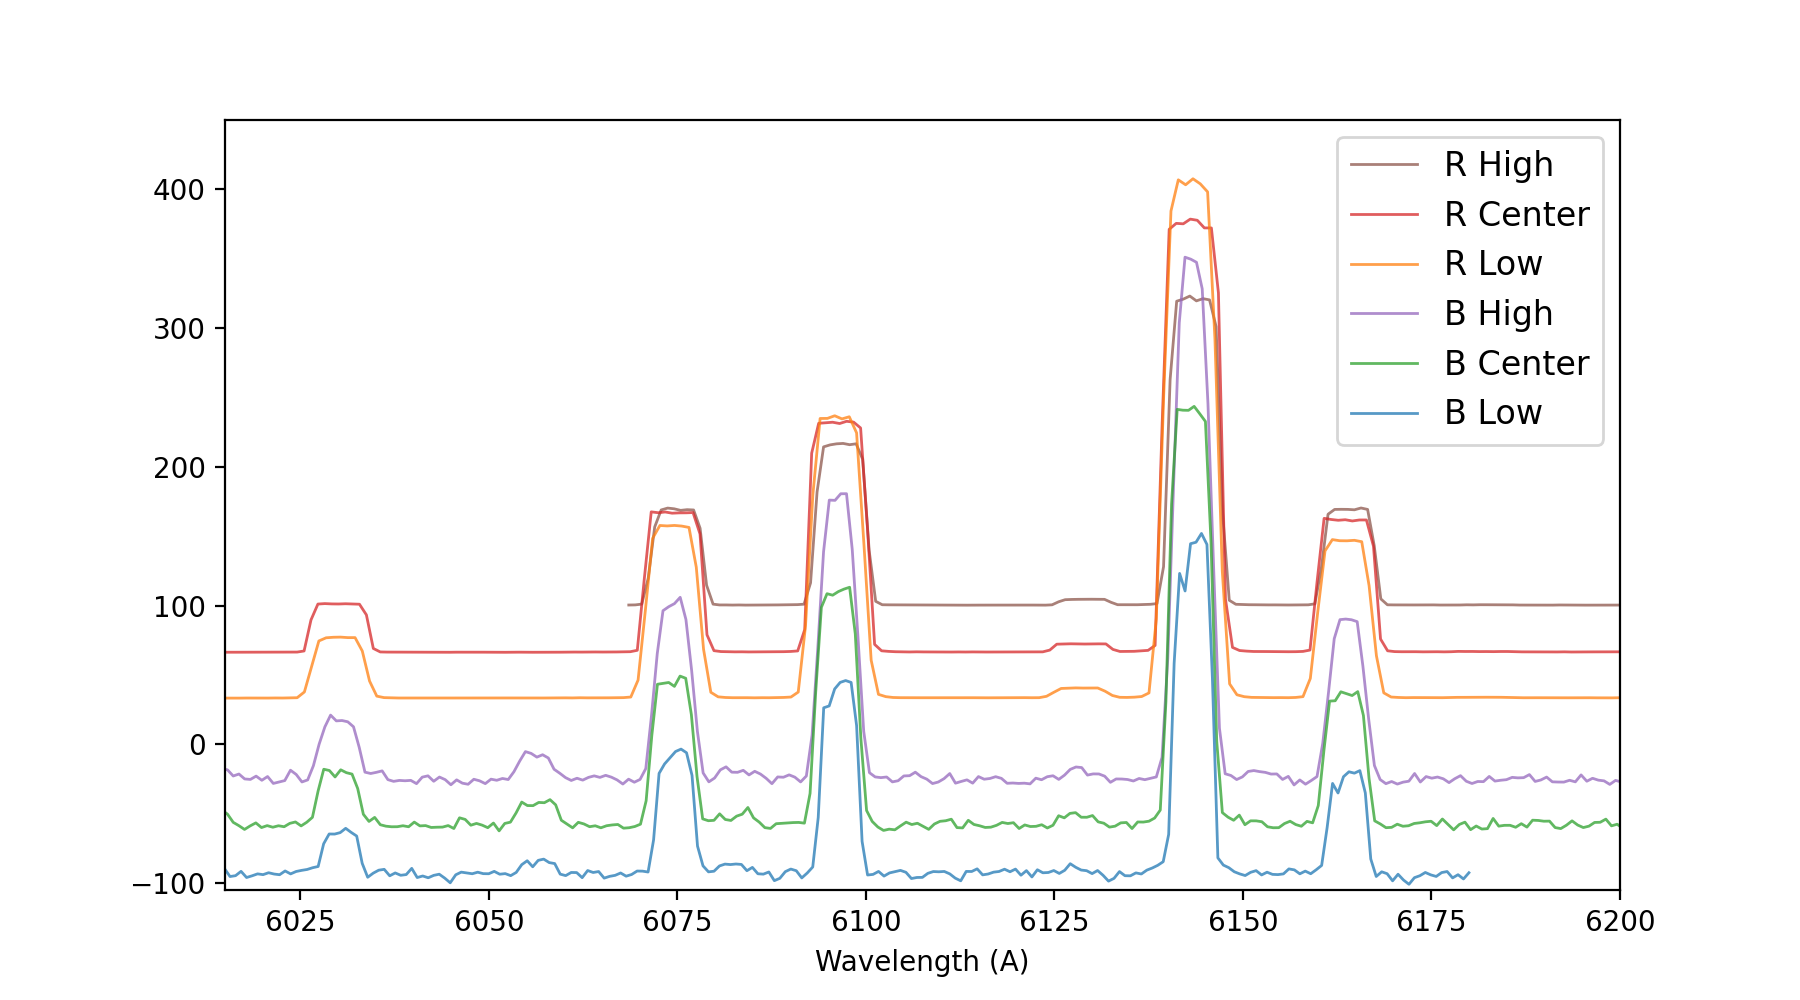

<ipython-input-261-88e4a40fe242>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(arc_fitg3.spectral_axis, arc_fitg3.flux.value/1000+33, alpha=0.75, label='R Low', lw=1, C='C1')


In [261]:
plt.figure(figsize=(9,5))
plt.plot(arc_fitg2.spectral_axis, arc_fitg2.flux.value/1000+100, alpha=0.75, label='R High', lw=1, c='C5')
plt.plot(df_spec['wave'], df_spec['flux']+66, alpha=0.75, label='R Center', lw=1, c='C3')
plt.plot(arc_fitg3.spectral_axis, arc_fitg3.flux.value/1000+33, alpha=0.75, label='R Low', lw=1, C='C1')

plt.plot(arc_bh.spectral_axis, arc_bh.flux.value/10-33, label='B High', alpha=0.75, lw=1, c='C4')
plt.plot(blue_cent.spectral_axis, blue_cent.flux.value/10-66, label='B Center', alpha=0.75, lw=1, c='C2')
plt.plot(arc_bl.spectral_axis, arc_bl.flux.value/10-100, label='B Low', alpha=0.75, lw=1, c='C0')

plt.xlabel('Wavelength (A)')
plt.legend(fontsize=12)
plt.xlim(6015,6200)
plt.ylim(-105,450)
# plt.ylabel('Counts x10$^3$ / 2 sec')
# plt.title('KOSMOS Red - Internal Neon')
plt.savefig('Neon_overlap.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

<IPython.core.display.Javascript object>


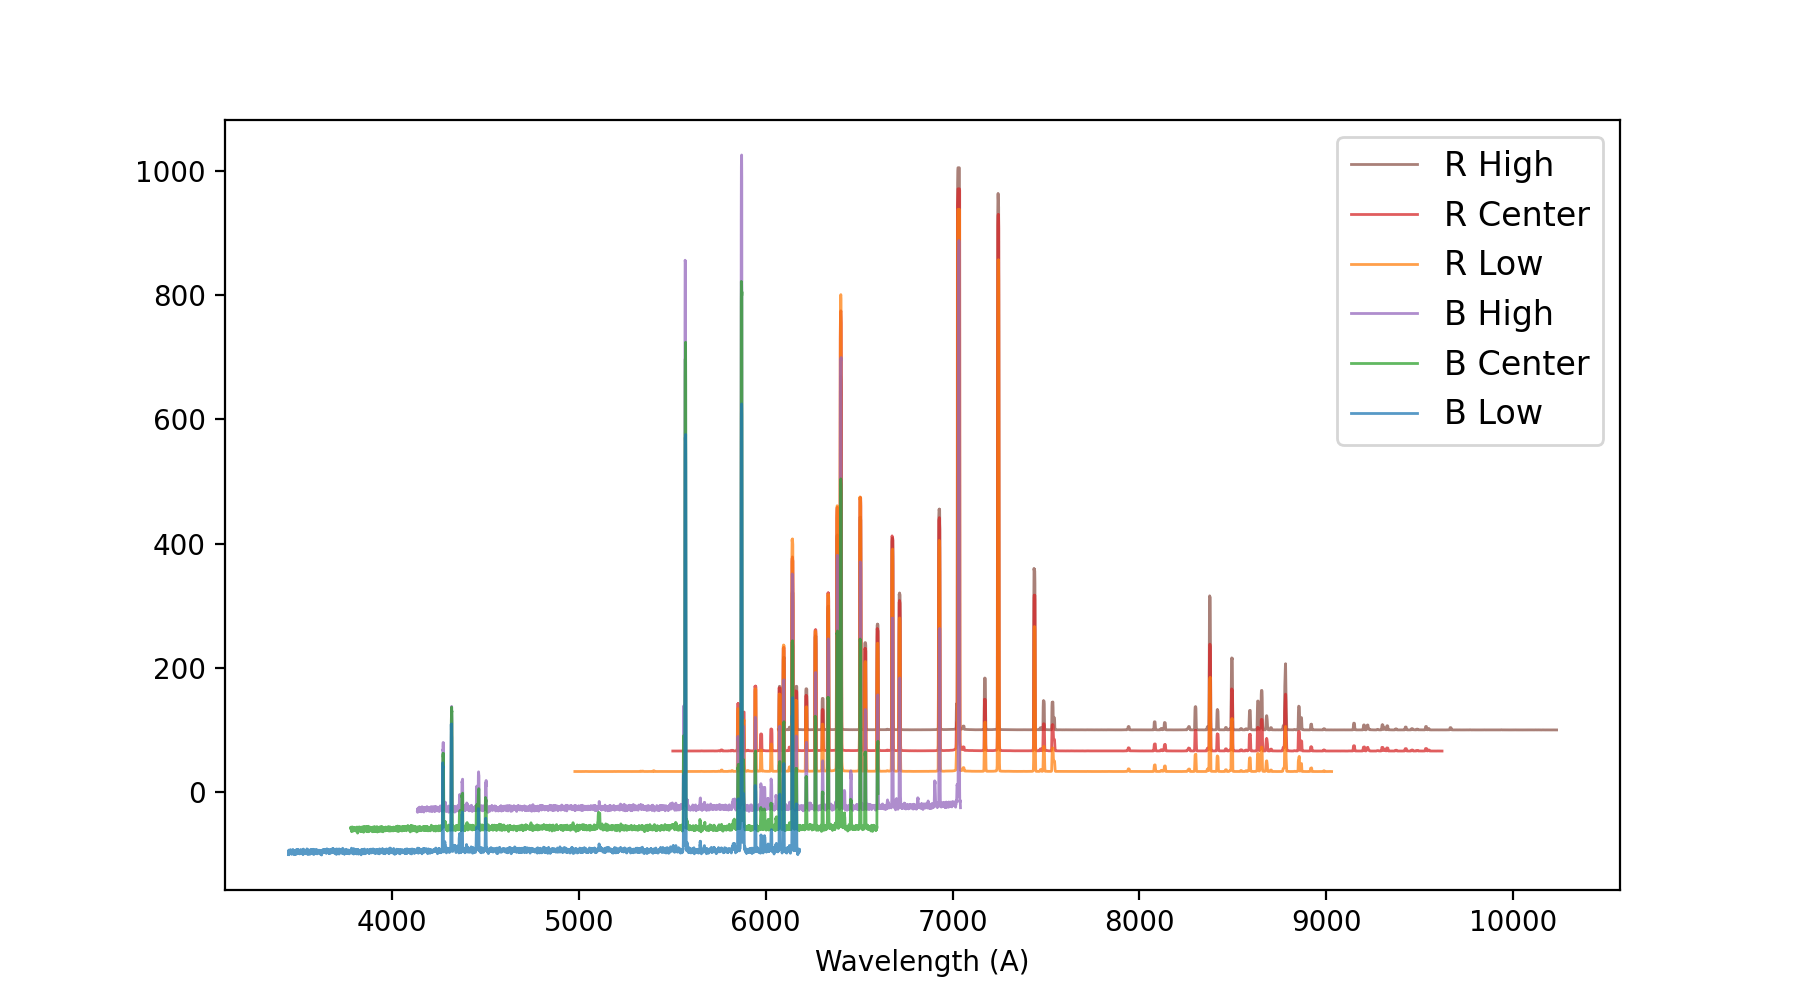

<ipython-input-262-503b3157eda7>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(arc_fitg3.spectral_axis, arc_fitg3.flux.value/1000+33, alpha=0.75, label='R Low', lw=1, C='C1')


In [262]:
plt.figure(figsize=(9,5))
plt.plot(arc_fitg2.spectral_axis, arc_fitg2.flux.value/1000+100, alpha=0.75, label='R High', lw=1, c='C5')
plt.plot(df_spec['wave'], df_spec['flux']+66, alpha=0.75, label='R Center', lw=1, c='C3')
plt.plot(arc_fitg3.spectral_axis, arc_fitg3.flux.value/1000+33, alpha=0.75, label='R Low', lw=1, C='C1')

plt.plot(arc_bh.spectral_axis, arc_bh.flux.value/10-33, label='B High', alpha=0.75, lw=1, c='C4')
plt.plot(blue_cent.spectral_axis, blue_cent.flux.value/10-66, label='B Center', alpha=0.75, lw=1, c='C2')
plt.plot(arc_bl.spectral_axis, arc_bl.flux.value/10-100, label='B Low', alpha=0.75, lw=1, c='C0')

plt.xlabel('Wavelength (A)')
plt.legend(fontsize=12)
# plt.xlim(6015,6200)
# plt.ylim(-105,450)
# plt.ylabel('Counts x10$^3$ / 2 sec')
# plt.title('KOSMOS Red - Internal Neon')
plt.savefig('Neon_all.png', dpi=150, bbox_inches='tight', pad_inches=0.25)